# Factor models <a id='factor_models'></a>

We are going to do some financial theory in this chapter. These notes follow largely from those I used in a two-credit *Advanced Investments* seminar, taught in the Spring of 2021.

You will see regression more generally in the DataCamp assignments.

## Where Do Returns Come From? Risks, Expected Returns, and Factors.

This is a Python class. Why is there suddenly a bunch of theory? If we are going to import data, run regressions, and think about how to measure sources of returns, we need a theoretical background. Theory doesn't mean impractical, though. Theory guides us and tells us where to look.

Theory, combined with common sense, can also help us know who might be [full of sh*t](https://noahpinion.substack.com/p/on-bullshit-in-investing?fbclid=IwAR3ZFhi7sWBeLNXy0LmLE7WgiDI5ftzffUEHkY_6immepF7fr911DDXCoqM), a very useful skill to develop.

These notes pull from Chapters 6, 7, and 14 of [a text by Andrew Ang](https://global.oup.com/academic/product/asset-management-9780199959327), formerly at Columbia and now at Blackrock, as well as texts by [Aswath Damodaran at NYU](https://pages.stern.nyu.edu/~adamodar/New_Home_Page/) and [Lasse Pedersen at the hedge fund AQR and also at NYU](https://www.lhpedersen.com). They are meant to provide an overview of recent thinking about how different risks lead to different sources of returns.

I start with re-introducing **market efficiency**. I want to make sure that we are clear about what it means, does not mean, and the challenges that face us as investors. This basic idea will guide us as we try to figure out how to approach the investment process. I then introduce two important and related concepts: **equilibrium** and **limits to arbitrage**. We need these ideas if we are going to think about how investors make (or don't make) money.

We then get into the heart of this chapter, **risk factors (or premiums)**. These notes guide you through a deceivingly simple idea -- you must take risks to earn a return. This idea is at the heart of the entire course. I want us to be about to sort out the sources of returns, which come from taking risk, and which are **anomalies** that may or may not persist. Both require skill to capture.

We'll also discuss recent challenges to these ideas. For example, the "value" strategy described below has done very poorly recently. Many quant funds that are investing based on these ideas have struggled. Then again, so have many traditional active managers who meet with CEOs, look at SEC filings on Bloombergs, and have analysts creating DCF models. These managers have likely never thought about the systematic sources of their returns, but have under-performed just the same.

We'll end with how to estimate some simple factor models using Python.

Overall, I hope to show you that investing is both very difficult and kind of simple, depending on how you're looking at the process.

## It Is Tough To Beat The Market

There is a great deal of evidence that markets are reasonably efficient. What do I mean by this? Simply put, making consistent positive, risk-adjusted returns over time is difficult. Market efficiency, however, **does not imply** that current market prices are "right", that the CAPM is the best theory of risk and return, or that analysts and portfolio managers have no skill.


```{figure} ../images/10-mf.png
---
name: 10-mf.png
align: center
---
Persistent, positive, risk-adjusted returns are very difficult to achieve. Source: NY Times.
```

In his [text on firm valuation](https://pages.stern.nyu.edu/~adamodar/New_Home_Page/dam2ed.htm), Aswath Damodaran discusses what market efficiency means:

> If markets are not efficient, the market price may deviate from the true value, and the process of valuation is directed toward obtaining a reasonable estimate of this value. Those who do valuation well, then, will be able to make higher returns than other investors because of their capacity to spot under- and overvalued firms. To make these higher returns, though, markets have to correct their mistakes (i.e., become efficient) over time.

> Market efficiency does not require that the market price be equal to true value at every point in time. All it requires is that errors in the market price be unbiased; prices can be greater than or less than true value, as long as these deviations are random.

> The fact that the deviations from true value are random implies, in a rough sense, that there is an equal chance that any stock is under- or overvalued at any point in time, and that these deviations are uncorrelated with any observable variable. For instance, in an efficient market, stocks with lower PE ratios should be no more or no less likely to be undervalued than stocks with high PE ratios. If low PE stocks do have higher returns, this must be due to risk.

Market efficiency does not imply many of the things often ascribed to it. Again, from Damodaran:

> An efficient market **does not** imply that: 1) Stock prices cannot deviate from true value; in fact, there can be large deviations from true value. The only requirement is that the deviations be random. 2) No investor will beat the market in any time period. To the contrary, approximately half of all investors, prior to transaction costs, should beat the market in any period. 3) No group of investors will beat the market in the long term. Given the number of investors in financial markets, the laws of probability would suggest that a fairly large number are going to beat the market consistently over long periods, not because of their investment strategies but because they are lucky. It would not, however, be consistent if a disproportionately large number of these investors used the same investment strategy.

In short, market efficiency means that prices generally reflect the available information and that you shouldn't be able to consistently pick assets that give you positive risk-adjusted returns, though a few may get lucky.

What is the evidence that most professionals have a difficult time consistently beating their index, after fees? There is a **large** amount of work on this, but {numref}`10-spiva.png` below from the [2019 S&P SPIVA U.S. Scorecard](https://www.spglobal.com/spdji/en/documents/spiva/spiva-us-year-end-2019.pdf) sums things up. Most managers fail to beat their benchmarks after fees. This is true for mutual funds, individual investors, hedge funds, and private equity managers.


```{figure} ../images/10-spiva.png
---
name: 10-spiva.png
align: center
---
Most mutual fund managers, across styles, fail to beat their self-described benchmarks in a given year. Source: [2019 S&P SPIVA U.S. Scorecard](https://www.spglobal.com/spdji/en/documents/spiva/spiva-us-year-end-2019.pdf)
```

In the face of evidence like this, we need to think carefully about how to approach the investment process. What should we be focusing on?

This, from a [2018 interview with Ed Thorp](https://www.aqr.com/Insights/Research/Interviews/Words-from-the-Wise-Ed-Thorp), one of the great investors of the last 100 years, sums up my thinking:

> The problem is that, even though markets are not strongly efficient in the sense of EMH, it is still difficult to find edges. By “edge,” I mean excess return after adjusting for risk, net of costs. Also, when an edge is discovered, the money that is poured into it makes the edge go away, because it moves prices toward correct pricing. So, I do not think EMH is quite the right mental framework for thinking about markets, but it is a good start for almost everybody.


### Equilibrium Thinking

Market efficiency also **does not** imply that sophisticated investors unskilled. In fact, it is because many investors are smart and work hard that markets are reasonably efficient! I want to briefly discuss two important papers that make this point.

First, [Grossman and Stiglitz (1980)](http://www.dklevine.com/archive/refs41908.pdf) is the classic theoretical work that shows how markets can never be perfectly efficient. Investors must be compensated for spending time researching securities and trading them. If they don't do this, then market prices won't reflect all available public information. Therefore, there will always be enough inefficiency left in the market to entice skilled investors to do the work. In other words, market efficiency isn't some magic thing that happens. Active management, investors and traders with skill, are the ones who make it happen by **putting information into prices**.

More recent work by [Berk and Green (2004)](https://www.journals.uchicago.edu/doi/abs/10.1086/424739) shows how some of this might work in practice. Let's assume that a set of sophisticated investors have skill -- they can identify overvalued and undervalued securities, after taking the effort to do so. These investors generate positive risk-adjusted returns. Someone like me, who doesn't know what they're doing, can observe these higher returns and say "Hey, that manager has skill! Let me give them my retirement savings to manage!". Then, enough people like me do this, which drives down the manager's returns. Why? Because strategies that earn positive risk-adjusted returns don't scale. Too much money **arbitrages away** the opportunities. The manager keeps accepting money until there's no more risk-adjusted return left, though they are still earning fees on the assets that they manage. This theory, then, implies that even highly skilled managers will not consistently earn positive risk-adjusted returns!

In short, sophisticated, skilled investors who are allocated assets to manage end up making prices reasonably efficient (but not perfectly so) and, on average, do not earn after-fee, risk-adjusted returns for their investors consistently over time. You can make a strong case that this is what we see in the data. @pedersen2015 calls his book "Efficiently Inefficient" and makes it the organizing framework around which to think about hedge fund strategies, like long/short equity, convertible arbitrage, and macro-style investing.

### Limits to Arbitrage

But what about obviously mispriced stocks? Wasn't Zoom overvalued? And what about tech stocks in 1999? Or SPACs a year ago? Or GME? I mean, there was no way roughly \$300 or whatever was the correct intrinsic value of Gamestop, right?

First, if you think something is obviously overvalued or undervalued, ask yourself: Why am I right and this price wrong? Most of the time, you will reassess your views.

However, prices can deviate from fair value, a skilled investor like yourself can note this, and you might still find it difficult to profit from your knowledge! There can be frictions in markets that make it difficult to fully arbitrage away mispricings. These frictions allow mispricings to persist, though perhaps not for long. A skilled investor that can overcome these frictions can profit from these mispricings. We call these frictions **limits to arbitrage**, as developed in [Shleifer and Vishny (1997)](http://pages.stern.nyu.edu/~cedmond/phd/Shleifer%20Vishny%20JF%201997.pdf).

Why aren't markets perfectly efficient? In other words, why do these profit sources exist? I've never seen a trading strategy that was guaranteed to always make money, but there are strategies that have made profits more often than losses over long time periods. Why can certain strategies can make money? One reason, of course, is luck. However, we are interested in strategies that can be expected to continue to make money in the future, a repeatable process that generates alpha. To find such a repeatable alpha process, we need to understand where returns and alpha can come from.

```{figure} ../images/10-gme.png
---
name: 10-gme.png
align: center
---
Obviously, stock prices always reflect the discounted value of future expected cash flows.
```

Alpha can come from producing new information (e.g. mosaic theory, or putting pieces together) or from access to better information. A skilled analyst will do this. However, limits to arbitrage are another potential source. Perhaps news and other publicly available information simply does not always get reflected fully in the prices right away. Even though market prices certainly reflect a lot of relevant information, they don't always perfectly aggregate all information immediately. For example, when a company announces its earnings, prices move up on good news and down on bad news, but on average the price move is too small. Therefore, following good news, the price continues to drift up for several weeks after the announcement, on average, and after bad news the price drifts downward for a while, an effect called the post-earnings-announcement drift (PEAD). This is an example of an **anomaly** and, we might expect it to get weaker overtime if enough investors trade on it. But, it seems to have persisted for decades. Why?

What are the real-world limits of arbitrage? In his text, Lasse Pedersen gives us several:

1)  Arbitrage is often subject to **fundamental risk**, meaning that if a hedge fund buys a cheap security, say, an undervalued oil company, there is still a risk that the security will underperform due to a random event. This means that you might still be cautious about a position size, even if you are very confident in your analysis.

2)  Arbitrage is subject to **noise trader risk**, meaning that if a hedge fund buys a cheap security, it might become even cheaper before the price approaches the fundamental value. This point is made in a well-known paper by [Delong et al. (1990)](https://scholar.harvard.edu/shleifer/publications/noise-trader-risk-financial-markets). Noise traders moving the price further away from fundamental value then leads to short-term losses for the hedge fund (even if the trade was "right"), which can lead to capital redemptions, and the fund may not live to see the upside. This is the whole "markets can remain irrational longer than you can remain solvent" quote attributed to Keynes (though he might not have said it).

3)  Investors may actually rationally try **not** to arbitrage away an mispricing. Go with the flow! A hedge fund may try to "ride" a bubble rather than trading against it -- like George Soros during the Internet bubble -- especially when the hedge fund thinks that other smart investors will delay trading against the mispricing and "pop" the bubble. Work by [Brunnermeier and Nagel (2004)](https://scholar.princeton.edu/sites/default/files/hedgefunds_bubble_0.pdf) finds that hedge funds did this successfully during the late 1990's.

4)  There is **liquidity risk**. Liquidity, roughly speaking, refers to how easy it is to buy or sell a security without impacting the price. Many investors, instead of earning returns from stock selection, are really earning their returns by providing liquidity to markets. This means taking the other sides of trades when another investor wants to buy or sell. Liquidity risk is a limit to arbitrage, as it affects how easily you can take advantage of mispriced securities. **Market liquidity risk** is when transactions costs rise and make it more costly to trade. Highly leveraged strategies also have **funding liquidity risk** and risk running out of cash if a trade goes against them and they get a margin call. The forced selling that can occur creates a **liquidity spiral** and further reduces prices, causing more selling, etc. Hedge funds structure their contracts so that they have stable capital bases that allow them to [take advantage of mispricings](https://www.cambridge.org/core/journals/journal-of-financial-and-quantitative-analysis/article/abs/funding-liquidity-risk-and-the-dynamics-of-hedge-fund-lockups/59F9DAC7F5C19B387A0A69B244E39A91).

5)  Finally, I'll add an additional one: **career risk**. Basically, you can find the mispricing and be willing to deal with other limits to arbitrage, like noise trader risk. You might be willing to wait until the asset is worth its intrinsic value, but your clients might not be so willing.

Since arbitrage is limited by its costs and risks, arbitrage trading does not completely eliminate mispricing. Think about GME again. The hedge fund Melvin Capital thought that GME was overvalued in the \$20-\$30 range. The stock went to nearly \$160 in about three days and they needed a [capital infusion from Citadel and Point 72](https://www.bloomberg.com/news/articles/2021-01-25/citadel-point72-to-invest-275-billion-in-melvin-capital) after being down 30% on the year. I think you can make the case that GME actually was undervalued at \$20-\$30.

As Pedersen notes, an efficiently inefficient level of mispricing persists and profit opportunities remain for the skilled investor to navigate.

## Factors, Risk, and Return

Most returns come from taking risk. These are not arbitraged away -- they persist and are fair compensation for bearing a certain type of systematic risk. We call these types of risks **factors**.

Andrew Ang, formerly a professor at Columbia University and now a Managing Director at Blackrock, uses the analogy that factors are to assets (e.g. stocks and bonds) what nutrients are to food. Factors are the building blocks of asset risk and return. They determine how much return that you will get in different future states of the world. Different factor exposures mean different risk and return patterns. @ang2014 notes that there are three important similarities between factors in assets and nutrients in food:

1)  *Factors matter, not assets.* When making your basic portfolio decisions, such as your allocation to global stock and bond markets, think about the factor exposures that you want to end up with.
2)  *Assets are bundles of factors.* If you're trying to pick stocks and form a portfolio of 10-12 securities, you'll likely ignore factors and focus on why you think a security is mispriced. However, if you are making asset allocation decisions, you'll think about equities as having certain risks and bonds have other risks, rather than just as stocks and bonds.
3)  *Different investors will want different factors.* Your ability and willingness to take risk will determine the factors that you want in your portfolio.

Factors define **bad times**. They dominate in diversified portfolios and drive the returns that come from your asset allocation decisions. You earn a **premium** by owning assets that do poorly in bad times. This is an important difference between factors and nutrients -- factors are "bad" for you, in the sense that they add risk to your portfolio. But, we need to take these risks in order to earn the premium.

### Factor vs. Anomaly

Factors are about getting paid to take a risk. An **anomaly** is a (temporary) mispricing that is unrelated to risk. Factors are related to "big" risks, systematic risks, macroeconomic risks. They are present in all of our portfolios. Anomalies are different. They might go away if discovered. We've already mentioned one very well-known anomaly above (PEAD) that persists because of limits to arbitrage, not because it is related to systematic risk.

This line can get blurry. Not all risks look the same - some are easier to describe than others. Some trading strategies have more higher moment risks - more skewness or kurtosis (i.e. fatter tails). Some factors, like value and momentum, described below, can have a part of the return that looks like compensation for taking risk and a part of the return that looks like an anomaly caused by investors behaving irrationally.

Most professional investors follow a particular strategy. In other words, they have a philosophy or framework that guides their portfolio. This portfolio then generates returns. Most, if not all, strategies can be described by their exposure to a few different factors (e.g. long small value stocks or long volatility). A skilled manager might also add value by trading the factor particularly well or by also taking advantage of anomalies. This is the more proprietary aspect of the strategy. When evaluating a manager and a strategy, you want to separate out these different sources of returns in order to differentiate returns from taking risk and returns from skill.

This is hard. We need a risk model to separate beta(s), or our returns from taking risk, from alpha, our returns from skill.

## CAPM. Our First Factor Model.

The Capital Asset Pricing Model (CAPM), developed in the 1960's, is covered in every finance class. You learn the formula, are forced to rearrange it to solve for the unknown input, and use it as part of the WACC. Here it is yet again:

\begin{align}
E[R_i] = r_f + \beta_i \times ERP
\end{align}

This simple equation, though, tells us a story about risk and return. All expected returns start with the risk-free rate, $R_f$.[^factors-1] We typically use something like the 10-Year Treasury Yield in our context. The expected return on an asset i, $E[R_i]$, is proportional to the systematic risk of the asset, $\beta_i$. Systematic risk is measured by the equity risk premium, or ERP, which captures market returns. In other words, if an asset is expected to do very well when the market does well, it will have a high expected return. This asset will, however, do poorly when the market does poorly. These types of high beta assets have larger **risk premiums** associated with them, where the risk premium is $E[R_i] - R_f$.

[^factors-1]: We'll put aside complexities for now, such what to do outside of the U.S.

We know have our first building block. If you want to earn higher returns, own assets with higher betas and, therefore, more factor risk. These assets will pay off in good times, but will earn you negative returns in bad times.


```{figure} ../images/10-cal.png
---
name: 10-cal.png
align: center
---
The Capital Allocation Line, or CAL. The mean-variance frontier is the highest return you can get for a given level of risk. The CAL is all possible combinations have the highest Sharpe Ratio portfolio (the tangency portfolio) and the risk-free asset. If all investors have the same beliefs about all underlying assets, then they will all hold the same market portfolio, just in different quantities, depending on their risk preferences. Source: Asset Management by Andrew Ang
```

Does this make sense? Let's look at the 2008 -- 2009 Financial Crisis. As shown below, nearly all asset classes lost value during the crisis. This financial crisis was a **bad time** and assets with risk had a negative return. So, higher beta assets had worse returns. Zero beta assets, like cash, did fine. Some investments, like government bonds, turned into negative beta assets. All assets, though, were exposed to the same general, systematic, market-wide risk.

```{figure} ../images/10-asset-gfc.png
---
name: 10-asset-gfc.png
align: center
---
Almost everything went down during the financial crisis. Source: Asset Management by Andrew Ang
```

We should maybe, then, start the investment process by simply asking: how much of this general, systematic risk do we want in our portfolio? We're in the CAPM world now.

But, does the CAPM work out there in the real world? The basic idea worked well in the financial crisis, but if you test the model statistically, it doesn't hold up. It says that there's only one risk factor that matters -- market risk. {numref}`10-beta-return.png` shows that betas, as usually estimated by regression, do not explain future returns well. As you'll see in the next section, we need additional risks in order to explain returns. However, we still use the CAPM in practice, because it is so easy to think about and the general idea has truth to it. For example, CFOs around the world still find their firm's WACC using the CAPM.[^factors-2]

[^factors-2]: I also want to note that it is very difficult, if not impossible, to actually test both the idea of market efficiency and the CAPM together. In order to see if markets are efficient, you need a risk model, like the CAPM, to see if investors are earning positive risk-adjusted returns on average. However, suppose that you observe, based on the CAPM, that investors are earning positive risk-adjusted returns. Are markets inefficient and not reflecting all information? Or, is your risk model wrong? Or both? This is called the **Joint Hypothesis Problem and is what makes all of this so difficult.**


```{figure} ../images/10-beta-return.png
---
name: 10-beta-return.png
align: center
---
If we estimate firm betas and put the stocks into 10 different portfolios based on their betas (x-axis), it turns out that their betas do not explain future returns (y-axis) very well at all. Higher beta stocks should have higher returns in the future, on average, if beta explains risk. Instead of a positive slope, the relationship is pretty flat. Source: A Random Walk Down Wall Street by Burton Malkiel
```

What lessons does the CAPM hold for us as investors, and, especially, investors holding a complete portfolio, like someone saving for retirement or a university endowment? Andrew Ang gives us several:

1)  *Don't hold the individual asset. Hold the factor.* Diversify away the idiosyncratic risk (the risk that you don't get compensated for) and focus on your systematic risk.

2)  *Equilibrium is important.* Equilibrium in economics holds when supply equals demand. **The expected return on an asset sets supply equal to demand**. In investing, this means that all stocks, all bonds, all assets are owned by someone. But at what price? Or, equivalently, with what expected return? If no one wants to own a particular stock, then the price is too high and the expected return is too low. Prices will adjust until everything is owned.

This also means that the overall market risk premium is set by investor preferences and beliefs. It is not something that can be arbitraged away, like a mispriced security. It will always be there, even if the premium itself fluctuates as the economy changes.

3)  *The average investor owns the market portfolio.* How much of the market portfolio you hold depends on your risk preferences. Essentially, you only one one decision to make as an investor!

4)  *Risk premiums have an economic story.* Premiums will rise if investors become more risk averse or if market volatility increases. This is what happened in 2008 -- 2009. When prices fell, this reflected a shift to a new state of the world where lower prices set supply equal to demand. Expected returns, the risk premium, were higher after the prices fell.[^factors-3]

5)  *Risk is factor exposure.* We can see this from the definition of beta:

\begin{align}
\beta_i = \frac{cov(r_i, r_m)}{var(r_m)}
\end{align}

If an asset covaries more (i.e. moves more) with the market return, then it has a higher beta and higher risk. This is going to hold true for all of other factors that we talk about too - factor exposure means moving with the factor. Some assets, like an insurance product, will have negative betas. These are very valuable to hold, since they will go up when the market goes down. Instead of receiving a premium for them, you'll pay a premium.

6)  *Assets that pay off in bad times have low premiums.* These are the insurance products mentioned above. The premium can even be negative. Remember, bad times are defined as negative market returns in the CAPM.

[^factors-3]: I know, this seems weird when you first start thinking about it!

### What Assumptions Does the CAPM Model Make?

The CAPM is a theoretical model about the world. As originally stated back in the 1960's, it was developed by making some simple assumptions about investors and then seeing where the assumptions lead us mathematically. What are these assumptions and do they mean that the CAPM is hopelessly broken? Remember, we are trying to think clearly about where returns come from. Does more risk mean that we should expect more returns? How can we describe risk?

1)  *Investors only have financial wealth.* This is clearly false! Your most important asset right now is the future value of your labor income. We can actually [include this in the CAPM](https://www.onlinelibrary.wiley.com/doi/abs/10.1111/j.1540-6261.1996.tb05201.x). When we do that, a stock's beta does a better job of explaining the stock's return.

2)  *Investors have mean-variance utility.* This simply means that investors care about the mean return and the variance of that return. They don't care about other measures of risk, such as skewness or tail-risk (i.e. kurtosis). However, this doesn't seem to be true empirically. For example, stocks with greater downside risk (i.e. left-skewed returns) have [higher expected returns](https://onlinelibrary.wiley.com/doi/full/10.1111/j.1540-6261.2006.00836.x). This is what you would expect if investors did not like downside risk.

3)  *Investment decisions are made for a single period.* Well, this is obviously not true. However, it doesn't matter much for the actual CAPM result that beta explains risk and expected return. It does turn out, though, that it is optimal for investors to rebalance their portfolio to their target weights, instead of a strict "buy and hold" forever strategy.

4)  *All investors believe the same thing.* We call this homogeneous expectations. This is one of those simplifying assumptions that is obviously not true, but it turns out doesn't matter much as long as expected returns reflect the average of all investor beliefs.

5)  *No taxes or transactions costs.* In other words, no frictions for trading. If you break this assumption and add varying (heterogeneous) investor beliefs, than things do change. For example, suppose that large groups of investors are not allowed to short stocks. The price of these stocks won't reflect the negative beliefs of these investors. Stocks are then priced by the optimists.

6)  *Most investors are price takers.* Our trades don't affect prices. A certain sub-Reddit would like a word with this assumption.

7)  *Information is costless and available to investors.* This assumption is more true now than when the CAPM was first developed. However, as discussed above, someone has to get paid to collect the information and get that information reflected into prices. In markets where information is costly or more difficult to process, we might expect to find higher premiums and more anomalies to take advantage of. It turns out that the CAPM explains the returns of large, liquid stocks better than small, illiquid stocks.

## Expanding Our World. Multifactor Models.

You've already seen a multifactor model in your investments class. Remember Arbitrage Pricing Theory, or APT? This was the first attempt to generalize the CAPM. The theory simply says that there might be a lot of different types of risk that matter, as long as those risks can not be arbitraged away.

What risk can't be arbitraged away? Answering this question is difficult and involves decades of empirical and theoretical research by both academics and practitioners. In essence, we are asking ourselves: What risks can we get paid for taking?

The following notes are based largely on Chapter 7 of @ang2014.

We will discuss two big groups of factors: **macroeconomic** and **investment-style**. They are related -- what we are going to call style factors tell us something about the underlying economics of the firms. Style factors are **tradeable**, in that we can form portfolios based on them. Factors can be **rational** and simply say that we are getting paid to take more risk. They can be **behavioral** and related to persistent errors by market participants that are not arbitraged away. They can be a mix. They can be partially arbitraged away. They can have time-varying expected returns.

This is complicated! Keep this one thing in mind -- we are describing the building blocks for returns. Our sources of returns for common strategies. We'll usually talk about equity markets, but risk factors drive returns in fixed income, options, forex... everything.

## Macroeconomic Risks

These are intuitive. If a stock does well when economic growth is high, then it does well it good times and poorly in bad times. The CAPM might label this a high beta stock and you'll want to earn a premium for holding it. Why? Because the stock does well exactly when you don't "need" the return and does poorly when you'd like a higher return.

Beyond economic growth, you can think about other macroeconomic risks, such as inflation and volatility. All assets have varying degrees of exposures to these systematic risks.

It is also crucial to distinguish levels and expected changes vs. unexpected shocks. This risk is really about **unexpected changes** in economic growth or inflation. Expected changes should be priced into the security. For example, we have been in a low inflation environment for decades right now. This is priced in when we look at the yield curve. If inflation stays low, you won't have any unexpected gains or losses in your bond portfolio. If yields go negative, though, you would have an unexpected gain. If inflation comes back, you'll have a loss. Same thing with economic growth. If everyone expects positive economic growth and we get that growth, you shouldn't expect asset prices to react much.

```{figure} ../images/10-macro-risk.png
---
name: 10-macro-risk.png
align: center
---
Different returns and risk (volatility) across different macroeconomic environments. Source: Andrew Ang
```

{numref}`10-macro-risk.png` shows the performance of different equity portfolios, based on firm size, and fixed income portfolios do during different macroeconomic environments. First, note that small stocks beat large stocks over the full sample -- more on this below. Overall, stocks do better in economic expansions than bonds, as you probably expected.

Equity volatility is also higher during economic downturns, so investors demand a higher premium (higher returns) to hold these assets. There are two reasons for this. First, when equity values drop, the leverage of a firm increases, which increases their risk and drops the price. Second, investors will demand higher returns for holding higher risk stocks, independent of the increase in leverage, which also drops the price. This second channel is called the **time-varying risk premium**. As macroeconomic conditions worsen, investors demand higher returns, and asset prices drop. The opposite is true during good times.

```{figure} ../images/10-vix.png
---
name: 10-vix.png
align: center
---
Implied volatility increases during bad times, like 2008 -- 2009 and 2020.
```

{numref}`10-vix.png` shows how implied volatility, as measured from option prices, increases during times of market stress. Stocks do badly in these periods, but so do many other strategies, such as certain strategies in currency markets. More generally, you can think of some strategies as being "long volatility" and doing well in volatile periods, while many strategies are "short volatility". The latter do well most of the time, but can experience sudden, large losses.

Many hedge fund strategies are short volatility. On average, investors are willing to pay a premium for protection during volatile times. This means that some strategies act like they are selling insurance to investors. These strategies collect these premiums. However, disasters happen and sometimes you have to pay out very large sums.


```{figure} ../images/10-sell-vol.png
---
name: 10-sell-vol.png
align: center
---
Selling insurance (selling volatility) is a good business until it is not. Source: Andrew Ang
```

Andrew Ang summarizes some other macroeconomic risks, such as political risk, which can also affect asset returns. You can probably see how it becomes difficult to disentangle some of these things. For example, political risk could lead to more uncertainty about economic growth and increase volatility. It takes a skilled investor with a good mental model for macroeconomic events and their web of dependencies to navigate these.

One of the mistakes some investors have made since the financial crisis is actually thinking that there was too much risk out there, that the next crisis was about to happen, or that inflation was about to show up again after decades of low rates. There will always be another crisis, but being too fearful (i.e. thinking that equities are overvalued) means missing out on a decade plus of equity gains. That's tough to recover from.

## Style Factors

You can't directly trade economic growth or inflation.[^factors-4] These factors are embedded in our securities, but it is hard to separate them out. Investors usually, then, use **style factors** when decomposing strategies into their component sources of returns. These tradeable factors are also, we think, related to macroeconomic risks. We essentially define a style factor as a particular portfolio where the securities all share a certain set of characteristics that have had positive returns over time. We infer that these positive returns must be related to some kind of risk.[^factors-5]

[^factors-4]: Well, inflation is easier.

[^factors-5]: Style factors were first discovered statistically. In other words, we basically defined something that had positive returns that the CAPM couldn't explain as another source of risk. A lot of economists are not happy with this definition, since it doesn't tell us anything about the underlying source of risk and why it exists. Work by academics like [Lu Zhang at Ohio State](http://theinvestmentcapm.com/uploads/1/2/2/6/122679606/zhang2017efm.pdf) is trying to build economic models that explain why these risk premiums are out there. This is important work - in order to trade these factors, it would help to know why they are in the data and if they might go away!

[Fama and French (1993)](https://www.sciencedirect.com/science/article/abs/pii/0304405X93900235), along some other earlier papers by other authors, lead the way here. There model simply extends the CAPM to include two additional factor, size and value:

\begin{align}
E[R_i] = r_f + \beta_{i,mkt} \times (E[R_m] - r_f) + \beta_{i,smb} \times E[SMB] + \beta_{i,hml} \times E[HML]
\end{align}

The E means "expected" -- this formula links expected asset returns to expected factor returns. The first beta is the usual CAPM beta. But, now there are two other betas, or risks, that are captured by this model. SMB, or small minus big, is the return on a portfolio of small stocks less the return on a portfolio of large stocks. Small and large are based on the market capitalization of the firm. This return will be positive if small stocks beat large stocks in a given period (e.g. month). HML, or high minus low, is a portfolio that is long high book-to-market (B/M) stocks and short low B/M stocks. High B/M is a traditional way to define a "value" stock. So, HML will be positive if value stocks beat growth stocks in that period.[^factors-6]

[^factors-6]: The Fama-French portfolios go long on the 30% stocks with the "best" measure (e.g. highest B/M scores, or cheapest stocks) and short the 30% of stocks with the "worst" measure (e.g. lowest B/M, or most expensive stocks).

SMB and HML are suppose to capture the small and value premiums. In other words, Fama and French say that the CAPM is incomplete. Market betas do not fully explain the returns of small stocks or value stocks. At least historically, small stocks and value stocks have outperformed, even when you take into account their betas.


```{figure} ../images/10-factor-perf.png
---
name: 10-factor-perf.png
align: center
---
Factor performance over time. Value has had a tough time this past decade, though that might depend on how you define value. Source: [Arnott et al. (2020)](https://papers.ssrn.com/sol3/papers.cfm?abstract_id=3488748)
```

{numref}`10-factor-perf.png` gives you the performance and risk characteristics of several of the factors that we are going to discuss. Value is highlighted in blue. Historically, you could buy value stocks and short growth stocks and earn a positive risk-adjusted return, compared to the CAPM. This lead many people to think -- maybe the CAPM isn't the correct benchmark? So, in step Fama and French with their model that includes additional risk factors that explain returns.

I have also included a line graph, below, of various Fama and French-style factor cumulative returns since July of 1963. The market return (MKTRF) has done very well, which makes sense. This is a long-only portfolio of market risk. The other factors are all long-short portfolios, so you are giving up some returns if markets go up over time by being short stocks. You can see how HML had done well historically, but suffered lately. Same with SMB. But what about momentum, or MOM? That's the pink lone on top. This one is weird. We'll discuss all of them below.


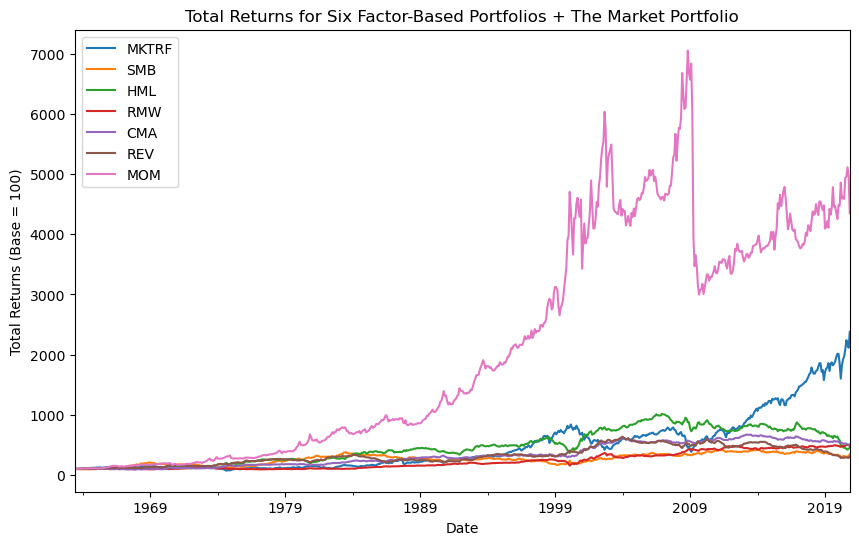

In [1]:
import numpy as np
import pandas as pd

ff = pd.read_csv('https://raw.githubusercontent.com/aaiken1/fin-data-analysis-python/main/data/ff_data.csv',
                  index_col=0, parse_dates=True)  

fig = ff.plot(figsize=(10, 6))
fig.set_ylabel('Total Returns (Base = 100)')
fig.set_title('Total Returns for Six Factor-Based Portfolios + The Market Portfolio');

As a Python aside, I'm using `.plot()` from `pandas` and saving the basic figure as *fig*. I'm then styling it using `matplotlib` methods. I can, of course, do all of this inside of the `.plot()` function as well. 


These are **long/short portfolios** that you can form with very simple, mechanical rules. But, what if you can't short? Can you just buy value stocks, buy momentum stocks? Academic factors are long-short portfolios, while the ETFs that try to capture these styles are often long-only. You might see some versions of these factors referred to as "smart beta", but we need to be careful with that term, as we'll see. It often is more about marketing than the underlying economics. And, long-only factor investing can have a **very different** experience than if you invested in the actual style portfolios graphed above. Also, none of the returns that I have shown you include transactions costs. In practice, actually owning the exact factor style portfolios can be very difficult.

Style factors can also explain how most active managers generate their returns. What do I mean by "explain"? Suppose you are a hedge fund manager with 40 stocks in your portfolio. You trade, buying things you like, shorting what you don't. You are up 28% in a year where the market was up 17%. You charge your clients 20% of those profits, along with your 2% management fee, and head off to a Greek island for some downtime. Then, some jerk academic comes a long and says "Well, actually, your 28% return is because you bought high market beta stocks with a lot of momentum in a market where those factors did really well. You were also short value stocks, which did terribly. Once you account for those risks, you actually underperformed." We'll look at the basic regressions for this later. Even though the style factors are simple, they seem to capture a lot of what professional investors are doing when creating strategies.

The notes below go through some of the most commonly discussed style factors. I will discuss each in terms of equities, though they usually have corresponding definitions in other asset classes, like fixed income or currencies.

### Size

Let's look a little closer at size and then value. FIrst, size. This was perhaps the [first factor discovered](http://business.unr.edu/faculty/liuc/files/BADM742/Banz_sizeeffect_1980.pdf), as problems with the CAPM were discovered basically as soon as it was published. The idea made sense -- risk and return should be linked. But, everyone quickly realized that risk, as proxied for by the market return, couldn't be the only thing out there. Small stocks did better than you would expect, given their market betas.

However, is this still true? It kind of depends. Since the mid-1980's, the SMB factor, as constructed by Fama and French, hasn't really outperformed, as you can see in {numref}`10-ang-size.png`. There is also a [lack of a size premium](https://www.sciencedirect.com/science/article/abs/pii/S0304405X12000931) in international data.


```{figure} ../images/10-ang-size.png
---
name: 10-ang-size.png
align: center
---
The small stock factor (SMB) has disappointed after the outperformance was discovered. Is it still a factor? Source: Andrew Ang
```

It could be that the premium was never real and the result of data mining. See the end of this chapter for a warning about the factor "zoo". It could also be that the small stock premium was an anomaly that rational investors saw and got rid of by bidding up the prices. Markets have also changed -- 50 years ago, you couldn't just download filings for and read Reddit boards on any stock traded anywhere in the world.

Some researchers and investors are trying to [resurrect a portion of the premium](https://www.aqr.com/Insights/Perspectives/There-is-No-Size-Effect-Daily-Edition), but only if you get rid of the low quality firms that tend to make up the small cap universe.

Overall, it seems like investors no longer receive a risk premium just for buying small stocks, though many other risk premiums and anomalies often have higher returns within the small cap universe, since arbitrage is more difficult among these less liquid stocks.

### Value

Value investing has worked historically even for very simple measures of value, such as a stock's book value of equity to market value of equity ratio (B/M). Across most of market history and across many different countries and markets, value stocks are likely to be those with high expected returns. But why? These returns could be driven by rational compensation for risk, by institutional frictions, or by behavioral reasons.

Why might value stocks be riskier? These are often cyclical firms with more macroeconomic exposure. They might do quite poorly in a recession, in bad times, when their market betas actually increase. For example, {numref}`10-qval.png` has the top holdings for the actively managed ETF, QVAL, which roughly equally-weights the value stocks that make it through their screening process. These are firms that are cheap, at least in part, for a reason! They are often not very flexible and stuck with older technology and business models that make it difficult to change with economic conditions. But, if you can handle the periods of poor performance, a strategy of buying these types of stocks has earned a positive risk premium over time. The drawdowns are painful, though.


```{figure} ../images/10-qval.png
---
name: 10-qval.png
align: center
---
QVAL Top Holdings as of 1/27/21. Source: Alphaarchitect.
```

We can also tell behavioral, or irrational, stories about the value factor. In this case, the returns come from mistakes investors are making, not from additional risk. It could be that [investors extrapolate too much from the past](https://onlinelibrary.wiley.com/doi/abs/10.1111/j.1540-6261.1994.tb04772.x) -- they think that value stocks will stay cheap forever and that growth stocks will keep growing. When this doesn't turn out to be the case, value stocks rise and growth stocks fall, giving us the value premium. It could also be that investors are [too wary of value stocks](https://onlinelibrary.wiley.com/doi/abs/10.1111/0022-1082.00367), since they have seen the bad performance and don't want to go through that again.

The behavioral explanations leave us with a question, though. If value stocks are not truly riskier, then why don't more people buy them, raising prices, and lowering future returns? Maybe investors need a really long time horizon to capture the value premium.

There is also a debate on how exactly to measure value. Remember, these are simple measures that are suppose to capture the "essence" of what an actual analyst might do. We want a mechanical way to sort stocks into portfolios without actually thinking about the firm. [Arnott et al. (2020)](https://papers.ssrn.com/sol3/papers.cfm?abstract_id=3488748) argue that if we ditch the traditional book value in B/M and include intangibles, then their value measure performs much better recently. Intangible assets, such as the knowledge of your workers, are arguably more important now than they were 50 years ago.


```{figure} ../images/10-value-tangibles.png
---
name: 10-value-tangibles.png
align: center
---
Changing our simple definition of value to include intangible assets seems to improve recent performance of the value factor. Source: [Arnott et al. (2020)](https://papers.ssrn.com/sol3/papers.cfm?abstract_id=3488748)
```

I also want to be clear: **Valuation is not value investing**. We teach you how to value stocks using methods like DCF models. A DCF model can be used to value a low B/M, old-school industrial firm. You can value Apple. You can value Uber. You can value private firms. You can value public firms. You can value "value" stocks. You can value "growth" stocks. Anyone actively managing a portfolio is hoping to buy something that is undervalued, in the sense that the price will rise. That's the whole point! Even growth investors are value investors, in this tautological sense.

When we are discussing the value factor, we strictly mean the returns on a portfolio of stocks that are "cheap" on a certain measure, like B/M or EV/EBITDA. This happens to match up pretty well with what many self-described value investors actually do. But - just because buying the stocks in cheapest quintile of the value factor has performed poorly lately does not imply that valuation techniques are useless! True valuation, as in Damodaran's text, means understanding the firm, the industry, and how the underlying economics drive free cash flows and risk. We're just having the computer sort stocks by a ratio here.

### Momentum

OK, so, who looks at 10Ks anymore? Or B/M? Or any ratio? Aren't prices just the reflection of what someone is willing to pay, regardless of any kind of reality? All you need is a moving average and some breakouts to trade, right?

```{figure} ../images/10-sneaky.png
---
name: 10-sneaky.png
align: center
---
Seems about right.
```

If you're into that line of thinking, then the momentum family of factors is for you. Just look at past price moves! Assets that have been going up, keep going up. At least for a while. The MOM factor, shown in line graph above and in Figure {numref}`10-factor-perf.png`, is a portfolio where you buy stocks that have been going up for the past year (excluding the most recent month) and short stocks that have been going down. You then rebalance the portfolio each month. That's it. Historically, returns have been very good. Too good. Look again at the chart above. The trend is your friend with this positive feedback strategy.

```{figure} ../images/10-momentum.jpg
---
name: 10-momentum.jpg
align: center
---
Momentum can be very short-term or longer term. This is basically the "respectable" kind of technical analysis. Source: Matt Levine (Bloomberg)
```

One of the first papers to document this phenomenon was [Jegadeesh and Titman (1993)](http://www.business.unr.edu/faculty/liuc/files/BADM742/Jegadeesh_Titman_1993.pdf), though trend following like this was probably done by Ancient Egyptians trading grain futures. [Carhart (1997)](https://doi.org/10.1111%2Fj.1540-6261.1997.tb03808.x) showed how persistence in mutual fund returns (i.e. mutual funds that performed well last year performed well this year) could be explained by the momentum factor.

There are a couple of things that could be going on. First, people might overreact to news. Stocks with good news see prices pushed up too far. Stocks with bad news see prices pushed down too far. However, the opposite can also create momentum! If information slowly enters prices, then the change today is too small and is instead spread out over time. So, there are two behavioral stories: initial underreaction as people are slow to react to news, and a delayed overreaction, as people jump on the bandwagon.

There are [two types of momentum trades](https://breakingdownfinance.com/finance-topics/alternative-investments/time-series-momentum/). This first is called **cross-sectional** momentum. This is when you rank all securities based on their past performance and buy (sell) the ones with the best (worst) performance. For this to work, recent winners must outperform recent losers. There is also **time-series** momentum, where you just look at previous returns and don't rank winners and losers.

```{figure} ../images/10-eif-mom.png
---
name: 10-eif-mom.png
align: center
---
Momentum and reversals are capturing well-known dynamics in financial markets even if the language academics and quant investors use sounds a bit... different.
```

These trades are risky, though. Look back at {numref}`10-factor-perf.png`. [Momentum can crash](https://www.aqr.com/Insights/Research/Journal-Article/Momentum-Crashes). Hard. But, is this related to any kind of macroeconomic risk, like the small and value factors? It seems like it - momentum crashes happened during the Great Depression, in 2001, and during the financial crisis. Momentum also did very poorly during parts of last year, as the types of winning stocks kept switching around. Trend followers had whiplash.


```{figure} ../images/10-everywhere.png
---
name: 10-everywhere.png
align: center
---
Momentum and reversals are capturing well-known dynamics in financial markets even if the language academics and quant investors use sounds a bit... different.
```

Crucially, momentum isn't the opposite of value investing. It isn't just growth investing. Any kind of asset can have momentum, even value stocks! If you are using the long-short factors, value and momentum have a negative correlation, documented across countries and asset classes by [Asness et al. (2013)](http://pages.stern.nyu.edu/~lpederse/papers/ValMomEverywhere.pdf). However, this is not true for the long-only portfolios. Two long-only portfolios of stocks, even if one portfolio is value stocks and the other momentum stocks, are still going to both have a lot of market risk, which will dominate their returns and create a positive correlation. So, be careful with long-only factor ETFs. We'll discuss this more below.

I should also mention **reversals**. These are the opposite of momentum. If you form a portfolio of winners over the past year and short the losers, you get the momentum factor. But what about over longer time frames? It turns out, that if buy long-term losers and short long-term winners (excluding the last 12 months in each), then you can also create a [long-short style factor portfolio](http://mba.tuck.dartmouth.edu/pages/faculty/ken.french/Data_Library/det_lt_rev_factor.html) with positive returns over time. This is the REV portfolio in the line graph above. So, basically, markets exhibit medium term momentum and long-term reversals.

If you end up on a trading desk or at a quant firm, just note that these things all play out on much shorter time frames too. For example, [here's a paper about reversals](https://files.fisher.osu.edu/department-finance/public/liquidity_and_return_reversals.pdf) over the course of just a day or two. A firm like Renaissance[ Technologies](https://en.wikipedia.org/wiki/Renaissance_Technologies) is doing this at these levels (along with longer time frames). They are the perhaps the most successful investment firm in the last century and they don't even hire people with finance backgrounds.

Finally, the British economist J. M. Keynes seemed to have a pretty good grasp of momentum and, perhaps even, what we are seeing with GME and other "meme" stocks.

> ...day-to-day fluctuations in profits of existing investments, which are obviously of an ephemeral and non-significant character, tend to have an altogether excessive, and even absurd, influence on the market.

### Quality

Quality investing is the strategy of buying "good" stocks. High-quality stocks can be defined as stocks that are profitable, growing, stable, and well-managed. To capture this factor, you buy the best quality stocks and short the worst. I mean, this is basically what most investment managers are trying to do!

[Asness, Frazzini, and Pedersen (2013)](https://www.aqr.com/Insights/Research/Working-Paper/Quality-Minus-Junk) find that quality factors have delivered positive excess returns on average for both U.S. and global stocks and for both small and large stocks. Quality strategies buy the "good" stocks that deserve a higher-than-normal price (or valuation) and short the "bad" stocks that deserve to be cheap. This is in contrast to value factors that short the expensive assets and buy the cheap ones, regardless of whether they "deserve" their price or not.

Quality investing then complements simple value investing. Value and quality factors are negatively correlated in the data. Combining value and quality factors leads us to GARP-like investing, or "growth (quality) at a reasonable price" and has, historically, had higher risk-adjusted returns than either component by itself Combining quality, value, and momentum gives you an even stronger strategy that buys upward-trending stocks that are cheap relative to their quality and shorts falling stocks that are expensive.

Do you see how these "simple", mechanical strategies, when combined, start to look a lot like what a professional investor is trying to do?

[Fama and French (2015)](https://www.sciencedirect.com/science/article/abs/pii/S0304405X14002323) have their own version of quality with their five-factor model. You can see their two additional factors in the line graph above: RMW, or robust profitability minus weak profitability and CMA, or conservative investment firms minus aggressive investment firms. The first long/short portfolio captures the fact that high profitability firms outperform low profitability firms in the data. The second captures that low investment firms outperform high investment firms. Since the returns of these portfolios are not well-explained by the three-factor model, meaning that market, small stock, and value stock risk don't explain the out-performance, we call them new risk factors and throw them into the pile. In fact, adding these two new factors actually makes the value stock result a lot weaker.

So, what is this? A true risk factor? An anomaly? The returns are strong enough that I've included quality as a risk premium, rather than an anomaly that gets arbitraged away over time. You can also derive these relationships from a dividend discount model. This isn't necessarily a mispricing or the fact that the market is "missing" something. Important work by [Lu Zhang](https://seekingalpha.com/article/4368960-economic-intuitions-behind-q-factors) shows how higher expected profitability means higher discount rates, which means higher expected returns. Remember, a discount rate is the same thing as an expected return!

### Low Risk

The CAPM says that a security's expected excess return should be proportional to its market beta. But, it turns out safe stocks (i.e. low beta and/or low idiosyncratic volatility) do better than you would expect if the CAPM were the right risk model -- they have positive alpha. Remember, alpha is relative to a risk model, in this case the CAPM.

For example, suppose you wanted to form a market-neutral (i.e. zero beta) portfolio. You might need to buy about \$ 1.4 worth of safe (i.e., low-beta) stocks and short-sell \$ 0.7 worth of risky (high-beta) stocks in order to get the betas to offset. Historically, this portfolio has made money because it exploits the fact that, while safe and risky stocks have similar average returns, the safe stocks have significantly higher Sharpe ratios. This is called the ["betting-against-beta" portfolio (BAB)](https://www.aqr.com/Insights/Research/Journal-Article/Betting-Against-Beta).

One reason that low-risk investing has worked is that many investors face leverage constraints or are simply afraid of the risks that comes with leverage. So, instead of using leverage, they buy high beta stocks. This makes these stocks "too expensive". There are similar results for [low idiosyncratic risk stocks (standard deviation)](https://onlinelibrary.wiley.com/doi/full/10.1111/j.1540-6261.2006.00836.x), so this isn't just a beta story.

Do you think that leverage constraints as important in today's markets? If not, you might see investors buying low risk stocks on leverage to have a portfolio with an overall risk level that better matches their preferences. AQR [updates the data](https://www.aqr.com/Insights/Datasets/Betting-Against-Beta-Equity-Factors-Monthly) for this factor monthly on their website.

## Using Factor Thinking To Assess Your Performance

But what about all of the investors that don't use factors? For example, Warren Buffett never mentions the quality factor in his annual letter? It turns out that much of what active managers, fund managers who are trying to select undervalued assets to buy (and, perhaps, overvalued assets to short), can be explained using factors. We'll do a simple regression to see this.

I have posted Excel file called *hf_rets* on our Github page. I am going to run a regression where I try to explain a long/short equity hedge fund return index using the Carhart (1997) four-factor model, which is just the Fama-French model plus momentum. The returns are from 1994 through mid-2012. L/S equity hedge funds try to earn positive risk-adjusted returns by both going long stocks, as well as shorting stocks that they think are overvalued. So, there overall beta to the market is generally less than one, since they have a short equity component to their strategy. We want to see if their returns are explained by the standard risk factors that we've been talking about. All of the factor data can be found on [Ken French's website](https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/data_library.html).

This factor data has *umd*, or "Up Minus Down", which is similar to the momentum factor.

I will follow one of the DataCamps and use the [`statsmodels` library](https://www.statsmodels.org/stable/examples/index.html) to run the regression. I also clean up the column headers. Finally, note that I'm using `.read_excel()`.




In [2]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import janitor
from janitor import clean_names

hf = pd.read_excel('https://raw.githubusercontent.com/aaiken1/fin-data-analysis-python/main/data/hf_rets.xlsx',
                  index_col=0, parse_dates=True)  

hf = hf.clean_names()

hf.describe()


,rf,mkt_rf,smb,hml,umd,ln_sh_eq_hedge_fund_usd,eq_mkt_ntr_hedge_fund_usd,ded_sh_bs_hedge_fund_usd,global_mac_hedge_fund_usd,mngd_fut_hedge_fund_usd,emg_mkts_hedge_fund_usd,evnt_drvn_hedge_fund_usd,_cnvrt_arb_hedge_fund_usd,fx_inc_arb_hedge_fund_usd,djcs_hedge_fund_usd
count,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000
mean,0.002536,0.005089,0.002121,0.002133,0.004886,0.007535,0.004410,-0.002217,0.009594,0.005108,0.006656,0.007360,0.006129,0.004366,0.007011
std,0.001742,0.047007,0.035581,0.033738,0.054827,0.028745,0.029770,0.049144,0.028000,0.033738,0.042929,0.018291,0.019981,0.016485,0.021820
min,0.000000,-0.185500,-0.166200,-0.128700,-0.347500,-0.114806,-0.404590,-0.112825,-0.115652,-0.093702,-0.230716,-0.118201,-0.126007,-0.140442,-0.075948
25%,0.000900,-0.023225,-0.019750,-0.015275,-0.011225,-0.008805,0.001250,-0.033677,-0.001949,-0.018947,-0.012924,0.000110,-0.000482,0.001716,-0.002376
50%,0.003000,0.011550,-0.001450,0.002150,0.006300,0.007663,0.006715,-0.007478,0.010404,0.003235,0.012111,0.009848,0.009817,0.007131,0.007447
75%,0.004100,0.035600,0.023025,0.017750,0.030425,0.023168,0.012581,0.029215,0.021420,0.028790,0.028144,0.018590,0.014712,0.011529,0.018074
max,0.005600,0.115300,0.220600,0.138800,0.184000,0.129913,0.036573,0.226661,0.105808,0.099063,0.164018,0.042168,0.058055,0.043331,0.085117


In [3]:
model = smf.ols(formula='ln_sh_eq_hedge_fund_usd ~ mkt_rf + smb + hml + umd', data=hf)
results = model.fit()
print(results.summary())


                               OLS Regression Results                              
Dep. Variable:     ln_sh_eq_hedge_fund_usd   R-squared:                       0.760
Model:                                 OLS   Adj. R-squared:                  0.756
Method:                      Least Squares   F-statistic:                     172.1
Date:                     Tue, 19 Mar 2024   Prob (F-statistic):           4.09e-66
Time:                             10:15:36   Log-Likelihood:                 631.99
No. Observations:                      222   AIC:                            -1254.
Df Residuals:                          217   BIC:                            -1237.
Df Model:                                4                                         
Covariance Type:                 nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
In



To understand this regression, you just need to remember a few things from your statistic course. We have four coefficients, or **betas**, for each of the four factors. All are statistically significant at the 1% level. We know this from looking at the *t*-statistics and p-values. If the absolute value of a *t*-statistic is greater than 1.96, then we say that we can reject the null hypothesis that the coefficient is zero. 

The market beta for the hedge fund index is about 0.47 -- let's call that 0.50. So, if the market was up 1%, you would expect the average long-short equity hedge fund to be up 0.5%, all else equal. This tells us something right away -- the market is not a great benchmark for the typical hedge fund, since they don't have as much risk as the market.

Looking at the other coefficients, we see that *smb* is positive, *hml* is negative, and *umd* is positive. This means that the average fund in the index does better when small stocks beat large stocks, when value stocks do worse than growth stocks, and when winning stocks beat losing stocks. The average hedge fund in this sample likes small, growth stocks with momentum.

How well does the overall model do? The Adjusted R-Square is 0.756, or about 76%. 76% of the variation in returns is explained by the four-factor model.

What about **alpha**? The intercept is positive and statistically significant. This suggests that the average fund has positive risk-adjusted performance once you accounted for these four risk premiums.

In short, when you pay an active manager to run a fund for you, you are paying them to manage factor risks. You might also be paying them to exploit different anomalies, if possible. The average fund might have alpha after fees, though. But -- most of the variation in their returns is explained by the risks that they take, not any kind of magic ability to pick stocks.

```{figure} ../images/10-sources-of-returns.png
---
name: 10-sources-of-returns.png
align: center
---
Most investment strategies can be matched up with one or more sources of return. Source: Lasse Pedersen
```

If you're running your own actively managed portfolio with a lot of different positions, you should keep track of your factor exposures. Just because you own 20 different stocks, some options, maybe a few ETFs, etc., doesn't mean that you're well-diversified across factors. And, we've seen that your factor exposures will determine a large portion of your returns. Understanding your factor exposures is an important part of **risk management**. 

## An Example: Factor-Based ETFs

Factor theory, which really started with the CAPM, is about trying to explain where returns for assets come from. Why do some stocks have higher returns than others? What risks are associated with these assets that investors are willing to bear for a certain price? These are economic theories about risk and return that we explore with data. They may be right, they may be wrong, but they, we think, help to explain what we see around us in markets.

This thinking, lends itself to a certain type of **quantitative, or quant, investing**. These strategies simply seek to hold stocks that have factor exposures associated with higher expected returns and, perhaps, to short stocks that have exposures to the "bad" side of the factor. These strategies can be more complex, like some of the [funds run by AQR](https://www.aqr.com). Or, they can be for the retail investor, like [Vanguard factor-based ETFs](https://investor.vanguard.com/etf/factor-funds). You'll sometimes hear these products referred to as "smart beta".

All of these factor ETFs are using the same basic ideas discussed above. They are trying to **replicate what active managers do**, but without the active manager and for a lower fee (sometimes much lower). This isn't about artificial intelligence or anything fancy. It's just about noting that most returns come from a few factor premiums, so why not invest in those premiums and call it a day. You can read about a [Blackrock multifactor fund here](https://www.ishares.com/us/products/272824/ishares-msci-usa-multi-factor-etf).

```{figure} ../images/10-msci.png
---
name: 10-msci.png
align: center
---
A multifactor ETF from Blackrock.
```

How well have these strategies done? Like most quantitative strategies, they look [better in the backtest than in practice](https://papers.ssrn.com/sol3/papers.cfm?abstract_id=3622753). A **backtest** is when you take your mechanical strategy and see how well it would have done in the past. As they say, no one has ever seen a bad backtest, since you'll never show your clients one!

Why might this be the case? **Portfolio construction matters**. How do you weight your securities? What types of risk controls do you use? Are you sector-neutral, or did your B/M value factor end up putting nothing but small cap banks into your portfolio? Do you include small cap stocks that might have higher trading costs? How did you construct your measures? Are they too simple and fail to capture how the underlying economy changed? Or did you fine tune your quality factor to look great in the backtest, but not in reality?

That said, it isn't like active managers who don't think about factors (but end up investing in them, since they are present in all of our securities) have dramatically outperformed over the same period. It has been very difficult to beat a simple, market-cap weighted index, no matter your stated strategy.

You can actually [create your own factor ETF on our Bloomberg terminals](https://www.bloomberg.com/professional/blog/create-a-smart-beta-strategy-with-your-own-factors/).

## An Example: Buffett's Alpha

Forget quant-based factor investing. There are some ETFs that use the theory we've discussed, but the vast majority of actively managed assets are not invested this way.[^factors-7] We have already, though, seen that you can explain a manager's performance using factor theory. But, how about one manager? The most famous stock picker in history? Can we explain Warren Buffett's performance?

[^factors-7]: I might argue that basic index funds, like the Vanguard Total Stock Market fund, is a factor fund, if only for the tautological reason that it has a beta of one and no alpha, by design. It is a market factor fund and costs basically nothing.

Since I'm asking the question, you might guess that the [answer is yes](https://www.aqr.com/Insights/Research/Journal-Article/Buffetts-Alpha).


```{figure} ../images/10-buffett-info.png
---
name: 10-buffett-info.png
align: center
---
Among fund managers with at least 40 years of history, Buffett has arguably the best risk-adjusted return. Source: [Frazzini et al. (2018)](https://www.tandfonline.com/doi/full/10.2469/faj.v74.n4.3)
```

[Frazzini et al. (2018)](https://www.tandfonline.com/doi/full/10.2469/faj.v74.n4.3) find that Buffett has alpha if you just use traditional risk measures, such as SMB and HML. But, once you include their measures for quality and low risk investing, then you can explain away the positive risk-adjusted performance. Being one of the first to capture these premiums, even "unintentionally", along with his use of leverage, basically explains Buffett's returns.

```{figure} ../images/10-buffett-alpha.png
---
name: 10-buffett-alpha.png
align: center
---
With the full set of factors included in the regression, Buffett no longer has positive and significant alpha. UMD is momentum, BAB is "Betting Against Beta", and QMJ is Quality Minus Junk. Source: [Frazzini et al. (2018)](https://www.tandfonline.com/doi/full/10.2469/faj.v74.n4.3)
```


## A Warning: The Factor Zoo

How do we know about factors and anomalies? Practitioners and academics are both looking through data, trying to find sources of returns. Maybe these sources are related to risk. Or, maybe they are true mispricings that can be exploited. But, just because we find something in the data, does that make it real? Profs. Harvey and Liu have written several papers about the [factor zoo](https://papers.ssrn.com/sol3/papers.cfm?abstract_id=3341728), or the fact that there are over 400 documented factors and anomalies in the academic literature that, presumably, investors are trying to trade on. Most of these sources of returns look like what active managers are trying to do. Can they all be real? Do they continue to work after they are discovered?

The past does not guarantee the future. If a factor is truly related to risk, we would expect to earn a premium over time. But, that premium could be lower if investors are more risk tolerant, or if there is just less macroeconomic risk in the future. If a factor is really both a premium and an anomaly, then more investors trying to take advantage of it should lower its future return. Harvey and Liu caution us to be very skeptical. There are probably only a few big risk drivers. The rest are anomalies that get traded away or, perhaps, were never really there in the first place.

You can actually see evidence of the Zoo on our Bloombergs. There is a function FTW, or Factors to Watch, which will show you the returns for a very large number of supposed sources of performance. Many are grouped under categories like value, quality, momentum. For example, there is a gross profit anomaly/factor that is a lot like the [overall quality factor](http://rnm.simon.rochester.edu/research/QDoVI.pdf).


```{figure} ../images/10-bloom.png
---
name: 10-bloom.png
align: center
---
You can [evaluate trade ideas and entire portfolios](https://www.bloomberg.com/professional/blog/here-are-some-key-tools-for-exploring-an-investment-idea/) using a wide range of factors and anomalies on your Bloomberg.
```

Looking through these measures, you see again how we are breaking down how many active managers invest. What sorts of stocks might you buy because you think they are undervalued? Maybe a firm with a higher EBITDA/EV multiple than its peers that has expanding gross margins (evidence of a moat), positive earnings momentum, and that is above its 30-day moving average (the market is starting recognize the mispricing). Will this work in the future if everyone is reading from the same playbook and using the same Bloomberg screens?

And the speed that you can trade at matters. Here's an interesting Twitter thread on what it means to [trade a signal to capacity](https://twitter.com/macrocephalopod/status/1357377428390371328). In other words, if one investor is so fast that they can trade a short-term anomaly quickly, then it will look like that anomaly has disappeared, even if that one trader is still able to exploit it.

Finally, well-known quant [Emanuel Derman](http://emanuelderman.com) points out that these factors and parameters (e.g. volatility) may not be so easy to slice, dice, and trade. We probably know less than we think, even about basic stuff like risk and return. After all, finance is not physics. There are no unifying laws to discover, just people and behaviors to observe. Then, we do the best we can.

```{figure} ../images/10-derman.png
---
name: 10-derman.png
align: center
---
How does this transition from asset classes and securities to factors and parameters affect markets? Source: Emanuel Derman
```